In [ ]:
# !pip install tensorflow_hub
# !pip install tensorflow_hub

to make sure CoLab is running the correct version of TensorFlow.

In [ ]:
try:
    %tensorflow_version 2.x
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Note: using Google CoLab


loading Movie DataBase (IMDB) reviews

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

train_data, test_data = tfds.load(name="imdb_reviews", 
                                  split=["train", "test"], 
                                  batch_size=-1, as_supervised=True)

train_examples, train_labels = tfds.as_numpy(train_data)
test_examples, test_labels = tfds.as_numpy(test_data)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteYPW4T6/imdb_reviews-train.tfrecord…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteYPW4T6/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteYPW4T6/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
# Load a pretrained embedding model called gnews-swivel-20dim(trained on GNEWS data)
model = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(model, output_shape=[20], input_shape=[], 
                           dtype=tf.string, trainable=True)

In [ ]:
# embeding layer converst each word to a vector of 20 number
hub_layer(train_examples[:3])

<tf.Tensor: shape=(3, 20), dtype=float32, numpy=
array([[ 1.765786  , -3.882232  ,  3.9134233 , -1.5557289 , -3.3362343 ,
        -1.7357955 , -1.9954445 ,  1.2989551 ,  5.081598  , -1.1041286 ,
        -2.0503852 , -0.72675157, -0.65675956,  0.24436149, -3.7208383 ,
         2.0954835 ,  2.2969332 , -2.0689783 , -2.9489717 , -1.1315987 ],
       [ 1.8804485 , -2.5852382 ,  3.4066997 ,  1.0982676 , -4.056685  ,
        -4.891284  , -2.785554  ,  1.3874227 ,  3.8476458 , -0.9256538 ,
        -1.896706  ,  1.2113281 ,  0.11474707,  0.76209456, -4.8791065 ,
         2.906149  ,  4.7087674 , -2.3652055 , -3.5015898 , -1.6390051 ],
       [ 0.71152234, -0.6353217 ,  1.7385626 , -1.1168286 , -0.5451594 ,
        -1.1808156 ,  0.09504455,  1.4653089 ,  0.66059524,  0.79308075,
        -2.2268345 ,  0.07446612, -1.4075904 , -0.70645386, -1.907037  ,
         1.4419787 ,  1.9551861 , -0.42660055, -2.8022065 ,  0.43727064]],
      dtype=float32)>

In [ ]:
# here we add a layer to classify --> positive or negative
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 20)                400020    
                                                                 
 dense (Dense)               (None, 16)                336       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# here we use 'adam' training method for binary classification
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# saving weights
init_weights = model.get_weights()

In [ ]:
# do splitting, before fitting
x_val = train_examples[:10000]
partial_x_train = train_examples[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/20
30/30 [==============================] - 4s 118ms/step - loss: 0.3014 - accuracy: 0.8802 - val_loss: 0.3592 - val_accuracy: 0.8494
Epoch 2/20
30/30 [==============================] - 7s 247ms/step - loss: 0.2779 - accuracy: 0.8935 - val_loss: 0.3487 - val_accuracy: 0.8550
Epoch 3/20
30/30 [==============================] - 3s 105ms/step - loss: 0.2580 - accuracy: 0.9013 - val_loss: 0.3378 - val_accuracy: 0.8619
Epoch 4/20
30/30 [==============================] - 2s 65ms/step - loss: 0.2402 - accuracy: 0.9101 - val_loss: 0.3297 - val_accuracy: 0.8648
Epoch 5/20
30/30 [==============================] - 3s 100ms/step - loss: 0.2212 - accuracy: 0.9175 - val_loss: 0.3237 - val_accuracy: 0.8668
Epoch 6/20
30/30 [==============================] - 2s 72ms/step - loss: 0.2054 - accuracy: 0.9269 - val_loss: 0.3176 - val_accuracy: 0.8684
Epoch 7/20
30/30 [==============================] - 2s 68ms/step - loss: 0.1912 - accuracy: 0.9335 - val_loss: 0.3142 - val_accuracy: 0.8705
Epoch 8/2

Loss: measures the degree to which the neural network was confident in incorrect answers.

Accuracy: the percentage of correct classifications, regardless of the neural network's confidence.

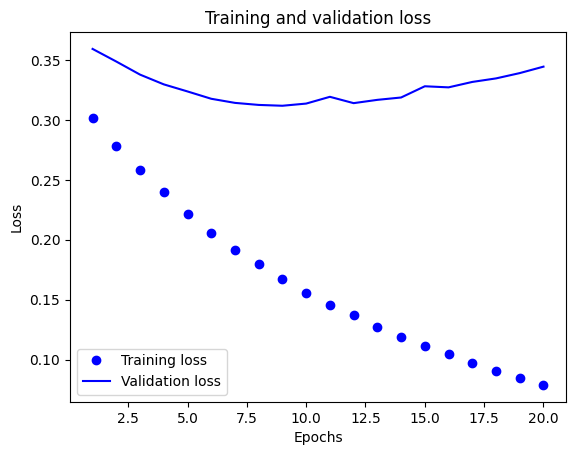

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

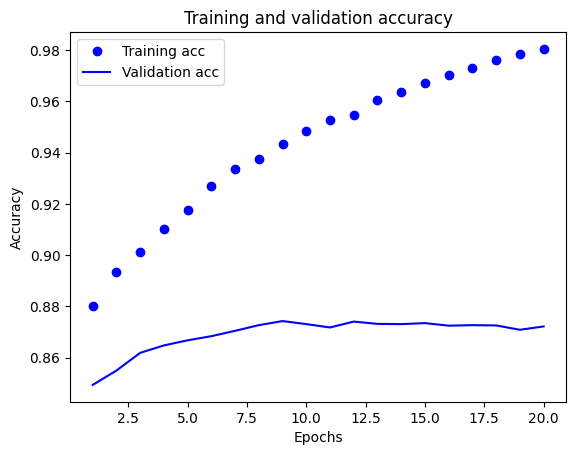

In [ ]:
# using early stopping to prevent overfitting on training
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

creating an early stopping monitor and restoring the network's weights to random. Once this is complete, we can fit the neural network with the early stopping monitor enabled.

In [ ]:

from tensorflow.keras.callbacks import EarlyStopping

# stop if after 5 step no significant changes are seen
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
        patience=5, verbose=1, mode='auto', 
        restore_best_weights=True)

model.set_weights(init_weights)

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    callbacks=[monitor],
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/40
30/30 [==============================] - 6s 210ms/step - loss: 0.6857 - accuracy: 0.5783 - val_loss: 0.6293 - val_accuracy: 0.6486
Epoch 2/40
30/30 [==============================] - 3s 92ms/step - loss: 0.6076 - accuracy: 0.6748 - val_loss: 0.6006 - val_accuracy: 0.6786
Epoch 3/40
30/30 [==============================] - 2s 66ms/step - loss: 0.5774 - accuracy: 0.7053 - val_loss: 0.5729 - val_accuracy: 0.7044
Epoch 4/40
30/30 [==============================] - 2s 69ms/step - loss: 0.5472 - accuracy: 0.7323 - val_loss: 0.5471 - val_accuracy: 0.7306
Epoch 5/40
30/30 [==============================] - 2s 69ms/step - loss: 0.5172 - accuracy: 0.7573 - val_loss: 0.5215 - val_accuracy: 0.7513
Epoch 6/40
30/30 [==============================] - 4s 120ms/step - loss: 0.4872 - accuracy: 0.7788 - val_loss: 0.4971 - val_accuracy: 0.7657
Epoch 7/40
30/30 [==============================] - 2s 70ms/step - loss: 0.4573 - accuracy: 0.7981 - val_loss: 0.4739 - val_accuracy: 0.7826
Epoch 8/40


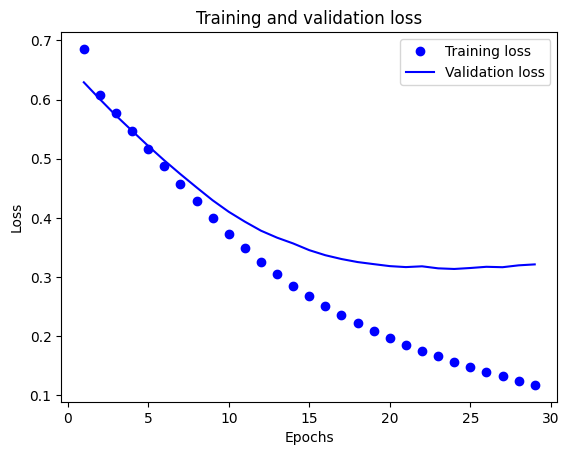

In [ ]:
#stopped at atep 29. The training history chart is now shorter because we stopped earlier.
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

evaluate the accuracy for the best neural network before early stopping occured.

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np

pred = model.predict(x_val)
# Use 0.5 as the threshold
predict_classes = pred.flatten()>0.5

correct = accuracy_score(y_val,predict_classes)
print(f"Accuracy: {correct}")

313/313 [==============================] - 4s 11ms/step
Accuracy: 0.8717
